### Importing libs

In [288]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline
import warnings
sns.set()
import sys
import os

In [289]:

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

### Data Reading

In [290]:
sys.path.append(os.path.abspath(os.path.join('..\scripts')))


from data_explore import Explore_Data
from clean_data import Clean_data
from outlier import Outlier


In [291]:

data_store = pd.read_csv('../data/store.csv') 
data_train = pd.read_csv('../data/train.csv', parse_dates = True, low_memory = False, index_col = 'Date')
data_test = pd.read_csv('../data/test.csv', parse_dates = True, low_memory = False, index_col = 'Date')

#### Train data exploration

In [292]:
print(Explore_Data(data_train))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


None

---


First 5 rows


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


---


Shape of the dataset


(1017209, 8)

---


Missing values count


Store            0
DayOfWeek        0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

#### Store Data Exploration

In [293]:
print(Explore_Data(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Clean Data

In [294]:
cleaner = Clean_data()

#### Missing Values


Train data set has no null values.
from the Store dataset CompetitionDistance has 3 missing values. they are small we can impute them with media.


In [295]:
data_store = cleaner.fill_with_mean(data_store,['CompetitionDistance'])

In [296]:
print(Explore_Data(data_store))


Dataframe summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


None

---


First 5 rows


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,NaN,NaN,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,NaN,NaN,NaN
4,5,a,a,29910.00,4.00,2015.00,0,NaN,NaN,NaN


---


Shape of the dataset


(1115, 10)

---


Missing values count


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

from the Store data CompetitionOpenSinceMonth and CompetitionOpenSinceYear have 354 missing values ,let's explore them first


In [297]:
print(np.sort(data_store['CompetitionOpenSinceMonth'].unique()))
print(np.sort(data_store['CompetitionOpenSinceYear'].unique()))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. nan]
[1900. 1961. 1990. 1994. 1995. 1998. 1999. 2000. 2001. 2002. 2003. 2004.
 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]


As we can see above the competitionOpenSinceMonth and competitionOpenSinceYear hold the month and year when new competition opened. Since there is competitionalDistance for all columns the time when new competition is started. having a null value for both competitionOpenSinceYear and competitionOpenSinceMonth is meaning full. It means competition for a store has already been there before the store is established. 

The longest time we have in the dataset is 1900. So I have replaced the None values with the first month 1990.

In [298]:
data_store['CompetitionOpenSinceMonth'] = data_store['CompetitionOpenSinceMonth'].fillna(1)
data_store['CompetitionOpenSinceYear'] = data_store['CompetitionOpenSinceYear'].fillna(1990)

Now we are left with Promo2SinceWeek , Promo2SinceYear and PromInterva.
Let's check the missing persentage 

In [299]:
cleaner.percent_missing(data_store)

'14.64'

Let's look into what data they are holding.

In [300]:
print(np.sort(data_store['Promo2SinceWeek'].unique()))
print(np.sort(data_store['Promo2SinceYear'].unique()))
print(data_store['PromoInterval'].unique())

[ 1.  5.  6.  9. 10. 13. 14. 18. 22. 23. 26. 27. 28. 31. 35. 36. 37. 39.
 40. 44. 45. 48. 49. 50. nan]
[2009. 2010. 2011. 2012. 2013. 2014. 2015.   nan]
[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [301]:
data_store[data_store['Promo2'] == 0][['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']].head(5)

,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN


From the above table we can see that the three columns depends on Promo2. the reason for missing the value is becouse Prom2 is equal to 0. The problem is we can not store this information in a month or a year. So we will create a new column holding if the store participated in promo2. Then we can replace Promo2SinceYear and Promo2SinceWeek with the earliest month and week.

In [302]:
print(pd.isnull(data_store['PromoInterval'][0]))

True


Now let's replace the missing value of Promo2SinceWeek and Promo2SinceYear with 0.

In [303]:
data_store['Promo2SinceWeek'] = data_store['Promo2SinceWeek'].fillna(0)
data_store['Promo2SinceYear'] = data_store['CompetitionOpenSinceYear'].fillna(0)

from the above info we can see that the only column with null value is PromoInteral. 

The PromotionInteral have 4 enties.Let's split those points into 4 

In [304]:
month_abbr = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
def getMonth(months, index):
  if(months == 0):
    return 0

  month = months.split(',')[index]
  return month_abbr.index(month)+1

In [305]:
data_store['PromoInterval'] = data_store['PromoInterval'].fillna(0)
data_store['PromoInterval0'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 0)))
data_store['PromoInterval1'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 1)))
data_store['PromoInterval2'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 2)))
data_store['PromoInterval3'] = data_store.PromoInterval.apply((lambda x: getMonth(x, 3)))
df_store = cleaner.drop_columns(data_store, ['PromoInterval'])

In [306]:
cleaner.percent_missing(data_store)

'0.0'

In [307]:
data_store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval0               0
PromoInterval1               0
PromoInterval2               0
PromoInterval3               0
dtype: int64

Let's now close stores with zero sales

In [308]:
data_train[(data_train.Open==0) & (data_train.Sales==0)].shape

(172817, 8)

There are1723817 stores that are closed and has no sales. To avoid biase forecast we will drop thsi values.

Let now check Open stories with 0 sales

In [309]:
data_train[(data_train.Open !=0) &(data_train.Sales==0)].shape

(54, 8)

54 stores are opened and has no sales. 54 is small number compared to the dataset, we will consider this as exceptional.

In [310]:
data_train = data_train[(data_train.Open != 0) & (data_train.Sales != 0)]
data_train.shape

(844338, 8)

As we can see in the output of the above , 844338 stores are open and has sales.

### Outlier Treating

Let's start with the train data. 

In [311]:
df_outliers = Outlier(data_train[['Sales', 'Customers']].copy())
overview = df_outliers.getOverview()
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
Sales,4859.00,6369.00,8360.00,3501.00,1.59,30769,3.64%,46.00,41551.00,6955.96,-392.50,13611.50
Customers,519.00,676.00,893.00,374.00,2.79,40853,4.84%,8.00,7388.00,762.78,-42.00,1454.00


<AxesSubplot:xlabel='Sales'>

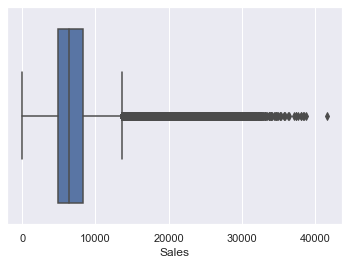

In [312]:
sns.boxplot(data_train.Sales)

<AxesSubplot:xlabel='Customers'>

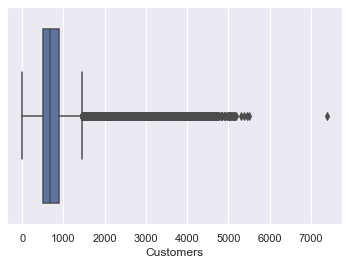

In [313]:
sns.boxplot(data_train.Customers)

lets's treating the outliers on the training data set

we will remove the outliers from the traning dataset using Interquartile Range

In [314]:
df_outliers = Outlier(data_train)
df_outliers.replace_outliers_with_iqr(['Sales', 'Customers'])
df_train = df_outliers.df

<AxesSubplot:xlabel='Customers'>

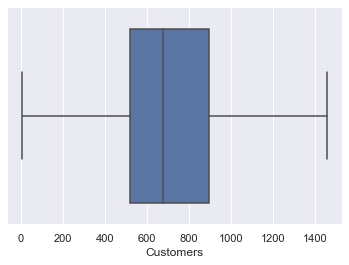

In [315]:
sns.boxplot(data_train.Customers)

<AxesSubplot:xlabel='Sales'>

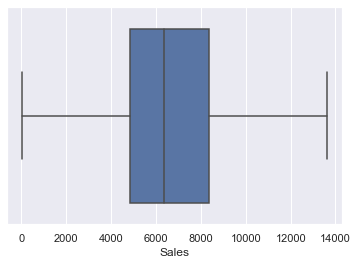

In [316]:
sns.boxplot(data_train.Sales)

Let's now treat store data. 

In [317]:
df_outliers = Outlier(data_store[['CompetitionDistance']].copy())
overview = df_outliers.getOverview()
overview

,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean,lower,upper
label,,,,,,,,,,,,
CompetitionDistance,720.00,2330.00,6875.00,6155.00,2.93,108,9.69%,20.00,75860.00,5404.90,-8512.50,16107.50


<AxesSubplot:xlabel='CompetitionDistance'>

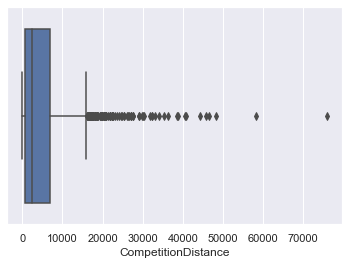

In [318]:
sns.boxplot(data_store.CompetitionDistance)

In [319]:
df_outliers = Outlier(data_store)
df_outliers.replace_outliers_with_iqr(['CompetitionDistance'])
data_store = df_outliers.df

<AxesSubplot:xlabel='CompetitionDistance'>

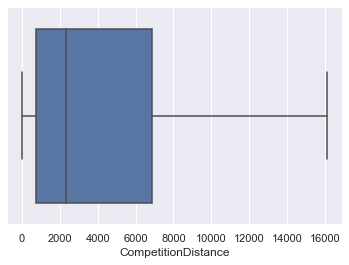

In [320]:
sns.boxplot(data_store.CompetitionDistance)

### Fix Data Types

#### Data_train

In [321]:
print("Unique data points in StateHoliday", data_store['StoreType'].unique())
print("Unique data points in StateHoliday", data_store['Assortment'].unique())
print("Unique data points in StateHoliday", data_train['StateHoliday'].unique())

Unique data points in StateHoliday ['c' 'a' 'd' 'b']
Unique data points in StateHoliday ['a' 'c' 'b']
Unique data points in StateHoliday ['0' 'a' 'b' 'c']


As we can see StateHoliday let's investigate it. Let's look at the unique values

In [322]:
data_train['StateHoliday'].value_counts()

0    843428
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [323]:
data_train['StateHoliday'].value_counts().index

Index(['0', 'a', 'b', 'c'], dtype='object')

Here we can see that O which is integer and the other are string. So let's convert the StateHoliday column into string.

In [324]:
cleaner.convert_to_string(data_train,['StateHoliday'])


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263.00,555.00,1,1,0,1
2015-07-31,2,5,6064.00,625.00,1,1,0,1
2015-07-31,3,5,8314.00,821.00,1,1,0,1
2015-07-31,4,5,13611.50,1454.00,1,1,0,1
2015-07-31,5,5,4822.00,559.00,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,682,2,3375.00,566.00,1,0,a,1
2013-01-01,733,2,10765.00,1454.00,1,0,a,1
2013-01-01,769,2,5035.00,1248.00,1,0,a,1


In [325]:
data_train.dtypes

Store              int64
DayOfWeek          int64
Sales            float64
Customers        float64
Open               int64
Promo              int64
StateHoliday      string
SchoolHoliday      int64
dtype: object

Now let us convert the date data to datetime format

In [327]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844338 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store          844338 non-null  int64  
 1   DayOfWeek      844338 non-null  int64  
 2   Sales          844338 non-null  float64
 3   Customers      844338 non-null  float64
 4   Open           844338 non-null  int64  
 5   Promo          844338 non-null  int64  
 6   StateHoliday   844338 non-null  string 
 7   SchoolHoliday  844338 non-null  int64  
dtypes: float64(2), int64(5), string(1)
memory usage: 58.0 MB


In [328]:
cleaner.drop_duplicate(data_train)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263.00,555.00,1,1,0,1
2015-07-31,2,5,6064.00,625.00,1,1,0,1
2015-07-31,3,5,8314.00,821.00,1,1,0,1
2015-07-31,4,5,13611.50,1454.00,1,1,0,1
2015-07-31,5,5,4822.00,559.00,1,1,0,1
...,...,...,...,...,...,...,...,...
2013-01-01,682,2,3375.00,566.00,1,0,a,1
2013-01-01,733,2,10765.00,1454.00,1,0,a,1
2013-01-01,769,2,5035.00,1248.00,1,0,a,1


#### Data_store

Check if there is any mixed data types.

In [329]:
cleaner.show_cols_mixed_dtypes(data_store)

None of the columns contain mixed types.


In [330]:
cleaner.drop_duplicate(data_store)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,c,a,1270.00,9.00,2008.00,0,0.00,2008.00,0,0,0,0
1,2,a,a,570.00,11.00,2007.00,1,13.00,2007.00,1,4,7,10
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2006.00,1,4,7,10
3,4,c,c,620.00,9.00,2009.00,0,0.00,2009.00,0,0,0,0
4,5,a,a,16107.50,4.00,2015.00,0,0.00,2015.00,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.00,6.00,2014.00,1,31.00,2014.00,1,4,7,10
1111,1112,c,c,1880.00,4.00,2006.00,0,0.00,2006.00,0,0,0,0
1112,1113,a,c,9260.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0
1113,1114,a,c,870.00,1.00,1990.00,0,0.00,1990.00,0,0,0,0


#### Data_test

Check if there is any mixed data types.

In [331]:
cleaner.drop_duplicate(data_test)

,Id,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,
2015-09-17,1,1,4,1.00,1,0,0
2015-09-17,2,3,4,1.00,1,0,0
2015-09-17,3,7,4,1.00,1,0,0
2015-09-17,4,8,4,1.00,1,0,0
2015-09-17,5,9,4,1.00,1,0,0
...,...,...,...,...,...,...,...
2015-08-01,41084,1111,6,1.00,0,0,0
2015-08-01,41085,1112,6,1.00,0,0,0
2015-08-01,41086,1113,6,1.00,0,0,0


 Let's change the data type of date in test data

In [333]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41088 entries, 2015-09-17 to 2015-08-01
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Open           41077 non-null  float64
 4   Promo          41088 non-null  int64  
 5   StateHoliday   41088 non-null  object 
 6   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


## Feature Engineering
